In [1]:
import sympy as sym
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
sym.init_printing()

Omega = sym.symbols('Omega', real=True)
k = sym.symbols('k', integer=True)



# Transformada de Fourier de tiempo discreto
La [Transformada de Fourier de tiempo discreto](https://en.wikipedia.org/wiki/Discrete-time_Fourier_transform) (DTFT) $X(e^{j \Omega})$ de una señal discreta $x[k]$ con $k \in \mathbb{Z}$ se denota mediante $X(e^{j \Omega}) = \mathcal{F}_* \{ x[k] \}$ se define en la ecuación \ref{eq:TFTD}:


\begin{equation}\label{eq:TFTD}
X(e^{j \Omega}) = \sum_{k = -\infty}^{\infty} x[k] \, e^{-j \Omega k}
\end{equation}

donde $\Omega \in \mathbb{R}$ representa la frecuencia angular normalizada.

Observe que $X(e^{j \Omega})$ es una función compleja y continua que contiene la información de la señal discreta $x[k]$ pero en el dominio de las frecuencias, por lo cual se le denomina el "espectro" de $x[k]$.

**Algunos autores pueden definir esta transformada mediante otras expresiones y por lo tanto debe considerarse tales definiciones al interpretar sus propiedades.**


Una condición suficiente pero no necesaria para que exista la DTFT emerge de la  [desigualdad triangular o desigualdad de Minkowski](https://en.wikipedia.org/wiki/Triangle_inequality) expresada en la ecuación \ref{eq:TFTD_cond1}:

\begin{equation}\label{eq:TFTD_cond1}
\left|X(e^{j \Omega})\right| = \left| \sum_{k = -\infty}^{\infty} x[k] \, e^{-j \Omega k} \right| 
\leq \sum_{k = -\infty}^{\infty} \left| x[k] \right| < \infty
\end{equation}

Por lo cual, si la señal $x[k]$ es absolutamente sumable, existe su DTFT.

La DTFT es periódica con periodo $T_\text{p} = 2 \pi$,

\begin{equation}
X(e^{j \Omega}) = X(e^{j (\Omega + n \cdot 2 \pi)})
\end{equation}

con $n \in \mathbb{Z}$. Observe que  $e^{j \Omega k} = e^{j (\Omega + 2 \pi) k}$ representa oscilaciones puras y también es periódica, por lo que solo es necesario analizar un periodo del espectro de una señal periodica.

La transformada inversa $x[k] = \mathcal{F}_*^{-1} \{ X(e^{j \Omega}) \}$ se define como:

\begin{equation}
x[k] = \frac{1}{2 \pi} \int_{-\pi}^{\pi} X(e^{j \Omega}) \, e^{j \Omega k} \; d \Omega
\end{equation}



## Transformada del Impulso de Dirac $\delta[k]$

La transformada $\mathcal{F}_* \{ \delta[k] \}$ del [impulso de Dirac](../discrete_signals/standard_signals.ipynb#Dirac-Impulse) se obtiene al introducir $\delta[k]$ en la definición de DTFT

La señal impulso de Dirac discreta es:

$$
\delta[k] = \left\{\begin{matrix}
0 & k \neq 0 \\
1 & k = 0
\end{matrix}\right.
$$



\begin{split}
\mathcal{F}_* \{ \delta[k] \} &= \sum_{k = -\infty}^{\infty} \delta[k] \, e^{-j \Omega k} \\
    &= ... + 0e^{-j \Omega \cdot(-2)} + 0e^{-j \Omega \cdot(-1)} + {1e^{-j \Omega \cdot(0)}} + 0e^{-j \Omega \cdot (1)} + 0e^{-j \Omega \cdot (2)} + ... \\ 
&= 1
\end{split}


Esto indica que todas las frecuencias normalizadas tienen el mismo peso en la señal impulso de Dirac.



## Transformada del Impulso de Dirac desplazado $\delta[k- \kappa]$

La señal impulso de Dirac discreta es:

$$
\delta[k- \kappa] = \left\{\begin{matrix}
0 & k \neq \kappa \\
1 & k = \kappa
\end{matrix}\right.
$$

\begin{split}
\mathcal{F}_* \{ \delta[k-\kappa] \} &= \sum_{k = -\infty}^{\infty} \delta[k - \kappa] \, e^{-j \Omega k} \\
& = ... +0e^{-j \Omega (\kappa-2)}+0e^{-j \Omega (\kappa-1)}+1e^{-j \Omega (\kappa)}+0e^{-j \Omega (\kappa+1)}+0e^{-j \Omega (\kappa+2)}+... \\ 
&= 1e^{-j \Omega (\kappa)}
\end{split}

Esto indica que todas las frecuencias normalizadas tienen el mismo peso en la señal impulso de Dirac pero aparecen términos de desplazamientos temporales $e^{-j \Omega (\kappa)}$.



## Transformada de la señal Rectangular $\text{rect}_N[k]$ 

Considere una señal rectangular $\text{rect}_N[k]$ .

$$
\text{rect}_N[k] = \left\{\begin{matrix}
0 & k < 0 \\
1 & 0 \leq k < N \\
0 & k \geq N \\
\end{matrix}\right.
$$

\begin{split}
\mathcal{F}_* \{ \text{rect}[k] \} &= \sum_{k = -\infty}^{\infty} \text{rect}[k] \, e^{-j \Omega k} \\
&= \sum_{k = 0}^{N-1} e^{-j \Omega k} \\
&= e^{-j \Omega 0} + e^{-j \Omega 1} + e^{-j \Omega 2} + ... + e^{-j \Omega (N-2)} + e^{-j \Omega (N-1)}     \\
\end{split}


Observe que la serie resultante es una [serie geométrica finita](https://en.wikipedia.org/wiki/Geometric_series) de la forma:

$$ \sum_{k = 0}^{N} a r^k = a \frac{1-r^{N+1}}{1-r} $$

Por lo cual la transformada puede escribirse como:

\begin{split}
\mathcal{F}_* \{ \text{rect}[k] \} &= \sum_{k = 0}^{N-1} 1 (e^{-j \Omega})^k \\ 
&= 1 \frac{1-(e^{-j \Omega})^N}{1-e^{-j \Omega}} \\
&= 1 \frac{1-e^{-j N \Omega}}{1-e^{-j \Omega}} \\
\end{split}


In [2]:
N = sym.symbols('N', integer=True, positive =True)

F_rect = sym.summation(sym.exp(-sym.I*Omega*k), (k, 0, N-1))
F_rect

⎧                  -ⅈ⋅Ω    
⎪     N       for ℯ     = 1
⎪                          
⎪     -ⅈ⋅N⋅Ω               
⎨1 - ℯ                     
⎪───────────    otherwise  
⎪      -ⅈ⋅Ω                
⎪ 1 - ℯ                    
⎩                          

<StemContainer object of 3 artists>

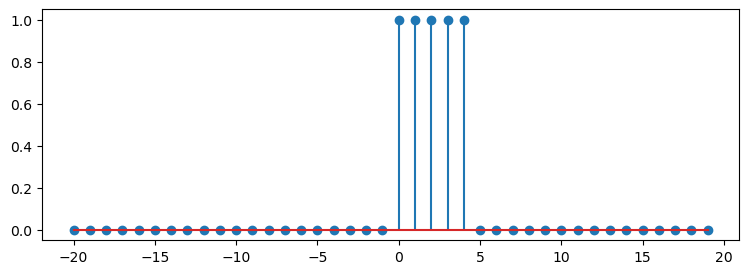

In [3]:
# Define una señal rectángular
Nr = 5 # Valor N
kr = range(-20, 20) # Rango de visualización
x = list(kr) # inicia valores de la señal
for ind,kx in enumerate(kr):
    if (kx>= 0) & ( kx < Nr):
        x[ind]=1
    else:
        x[ind]=0


plt.rcParams['figure.figsize'] = 9, 3
plt.stem(kr, x)

In [4]:
X = sym.summation(sym.exp(-sym.I*Omega*k), (k, 0, Nr-1))
X

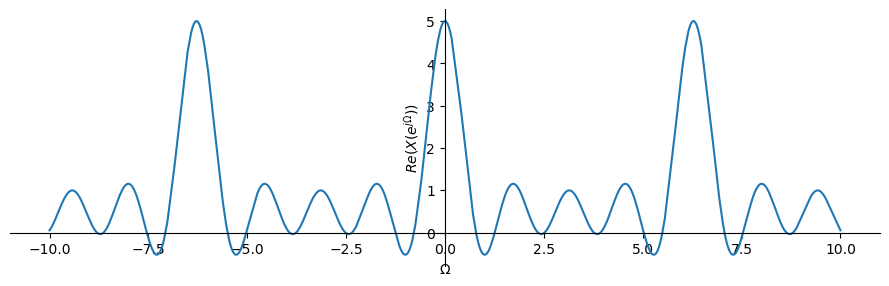

In [5]:
plt.rcParams['figure.figsize'] = 9, 3
sym.plot(sym.re(X), (Omega, -10, 10), xlabel=r'$\Omega$', ylabel=r'$Re( X(e^{j \Omega}) )$')

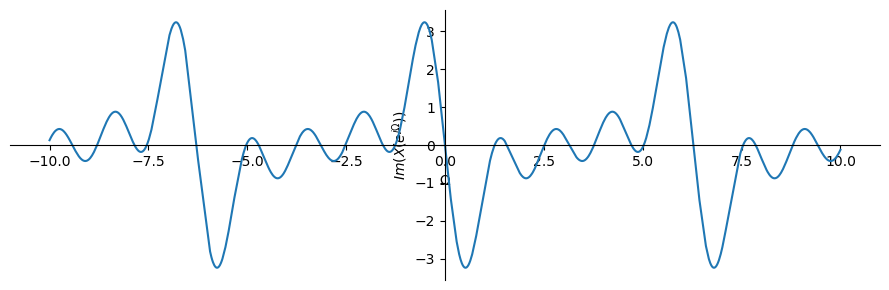

In [6]:
plt.rcParams['figure.figsize'] = 9, 3
sym.plot(sym.im(X), (Omega, -10, 10), xlabel=r'$\Omega$', ylabel=r'$Im( X(e^{j \Omega}) )$')

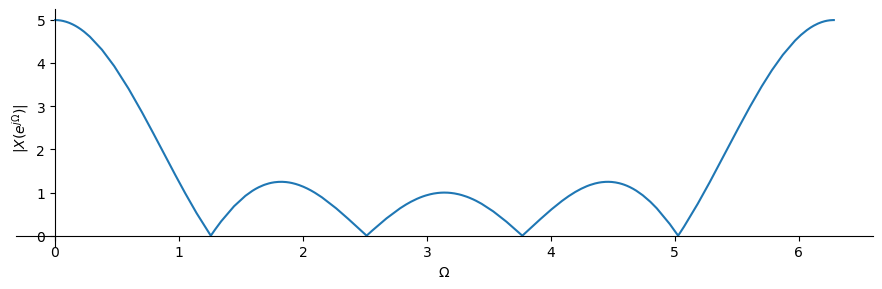

In [7]:
plt.rcParams['figure.figsize'] = 9, 3
sym.plot(sym.Abs(X), (Omega, 0, 2*sym.pi), xlabel=r'$\Omega$', ylabel=r'$| X(e^{j \Omega}) |$')

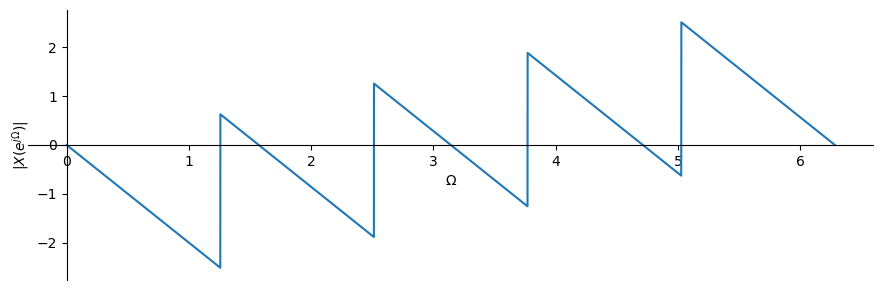

In [8]:
plt.rcParams['figure.figsize'] = 9, 3
sym.plot(sym.arg(X), (Omega, 0, 2*sym.pi), xlabel=r'$\Omega$', ylabel=r'$| X(e^{j \Omega}) |$')

¿Qué observa en las curvas de magnitud y la fase al  incrementar o disminuir el tamaño de la señal rectangular $N$?

## Transformada de la señal exponencial $e^{\Omega_0 k}\cdot \epsilon [k]$

La señal exponencial causal se define como:

$$
\left\{\begin{matrix}
0 & k < 0 \\
e^{\Omega_0 k} & k \geq 0
\end{matrix}\right.
$$

La transformada es:

\begin{split}
\mathcal{F}_* \{ e^{\Omega_0 k} \epsilon [k] \} &= \sum_{k = 0}^{\infty} e^{\Omega_0 k} \, e^{-j \Omega k} \\ 
&= \sum_{k = 0}^{\infty} e^{(\Omega_0 - \Omega j)k} \\
&= \frac{1}{1-e^{(\Omega_0 - \Omega j)}} \\
\end{split}


<StemContainer object of 3 artists>

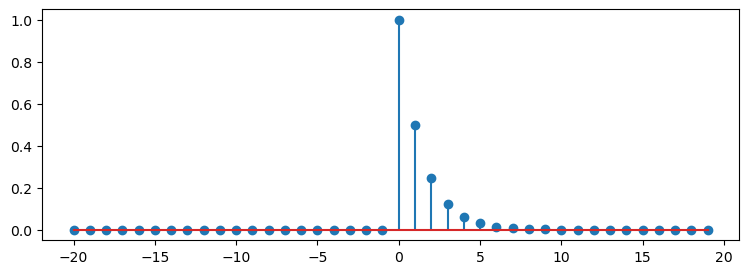

In [9]:
kr = range(-20, 20) # Rango de visualización
x = list(kr) # inicia valores de la señal
W0 = -0.7
for ind,kx in enumerate(kr):
    if (kx>= 0):
        x[ind]=np.exp(W0*kx)
    else:
        x[ind]=0


plt.rcParams['figure.figsize'] = 9, 3
plt.stem(kr, np.real(x))


<StemContainer object of 3 artists>

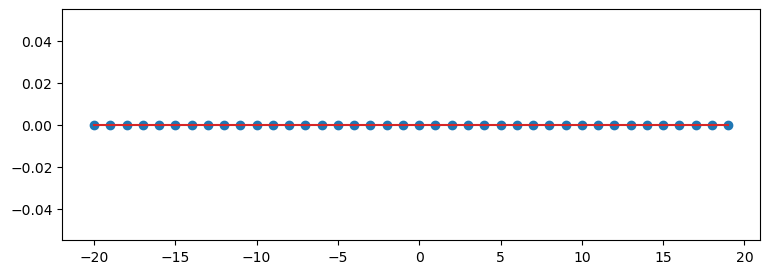

In [10]:
plt.rcParams['figure.figsize'] = 9, 3
plt.stem(kr, np.imag(x))

In [11]:
X = 1/(1-sym.exp(W0-1j*(Omega)))
rW = (Omega, -2*sym.pi, 2*sym.pi)
X

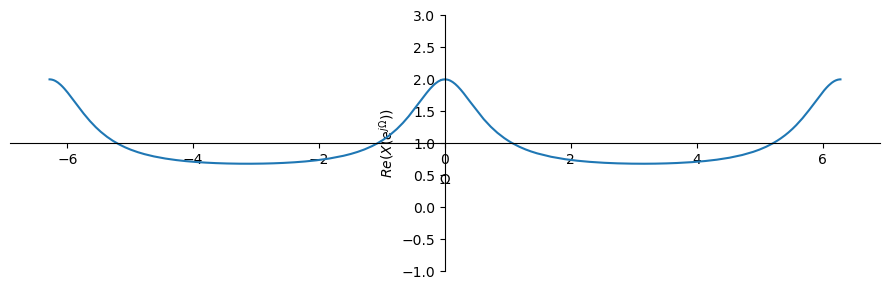

In [12]:
plt.rcParams['figure.figsize'] = 9, 3
sym.plot(sym.re(X), rW, 
         xlabel=r'$\Omega$', 
         ylabel=r'$Re( X(e^{j \Omega}) )$',
         ylim=(-1,3))

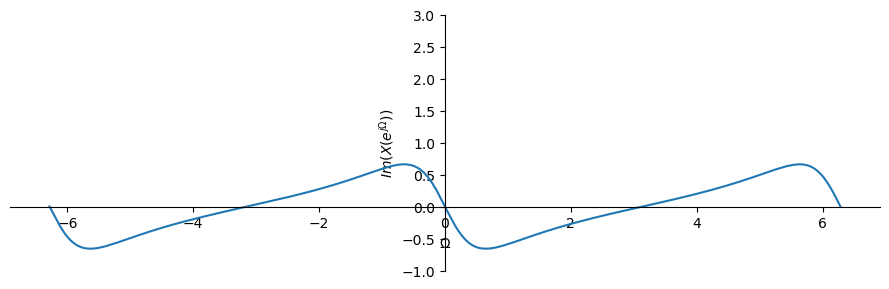

In [13]:
plt.rcParams['figure.figsize'] = 9, 3
sym.plot(sym.im(X), rW, 
         xlabel=r'$\Omega$', 
         ylabel=r'$Im( X(e^{j \Omega}) )$',
         ylim=(-1,3))

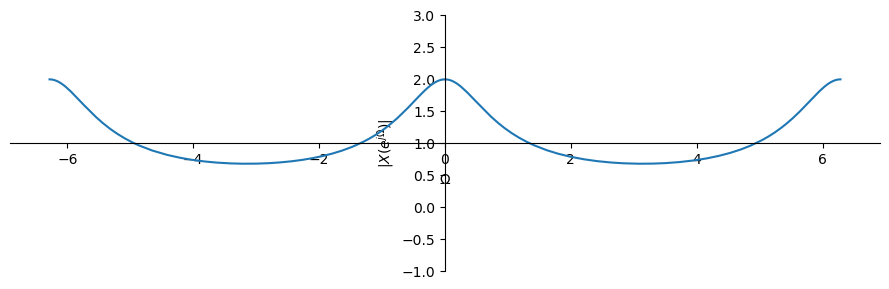

In [14]:
plt.rcParams['figure.figsize'] = 9, 3
sym.plot(sym.Abs(X), rW, 
         xlabel=r'$\Omega$', 
         ylabel=r'$| X(e^{j \Omega})|$',
         ylim=(-1,3))

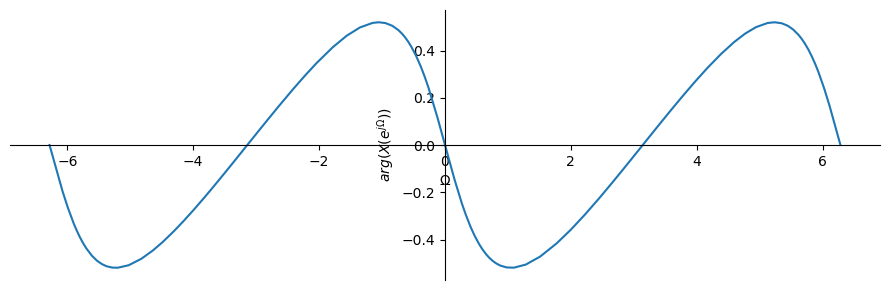

In [15]:
plt.rcParams['figure.figsize'] = 9, 3
sym.plot(sym.arg(X), rW,
         xlabel=r'$\Omega$',
         ylabel=r'$arg( X(e^{j \Omega}) )$')

## Transformada de la señal seno $\sin(\Omega_0 k)\cdot \epsilon [k]$

La señal seno causal se define como:

$$
\left\{\begin{matrix}
0 & k < 0 \\
\sin(\Omega_0 k) = \frac{e^{j\Omega_0 k}-e^{-j\Omega_0 k}}{2j} & k \geq 0
\end{matrix}\right.
$$



La transformada es:

\begin{split}
\mathcal{F}_* \{ \sin(\Omega_0 k)\cdot \epsilon [k] \} &= \mathcal{F}_* \{ \frac{e^{j\Omega_0 k}-e^{-j\Omega_0 k}}{2j}\}\\
&= \frac{\mathcal{F}_* \{e^{j\Omega_0 k}\}-\mathcal{F}_* \{e^{-j\Omega_0 k}\}}{2j}\\
&= \frac{\frac{1}{1-e^{(\Omega_0 - \Omega j)}} - \frac{1}{1-e^{(-\Omega_0 - \Omega j)}}}{2j} \\
\end{split}

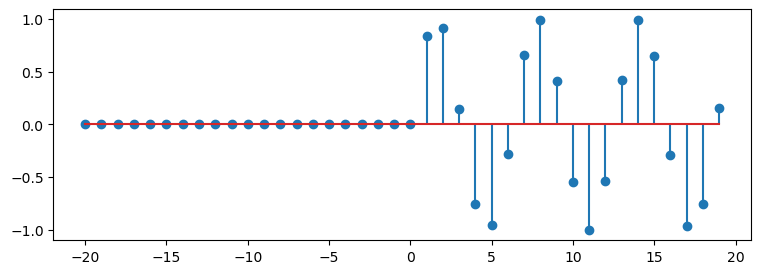

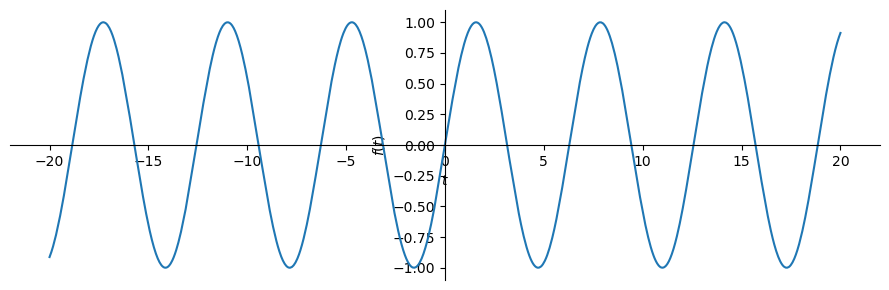

In [16]:
# Define una señal rectángular
t = sym.Symbol('t',real = True)
kr = range(-20, 20) # Rango de visualización de instantes k
x = list(kr) # inicia valores de la señal
W0 = 1 # 0.5*np.pi # np.pi/4
for ind,kx in enumerate(kr):
    if (kx>= 0):
        x[ind]=np.sin(W0*kx)
    else:
        x[ind]=0

x_cont = sym.sin(W0*t)
plt.rcParams['figure.figsize'] = 9, 3
plt.stem(kr, np.real(x))
sym.plot(x_cont,(t,-20,20))

<StemContainer object of 3 artists>

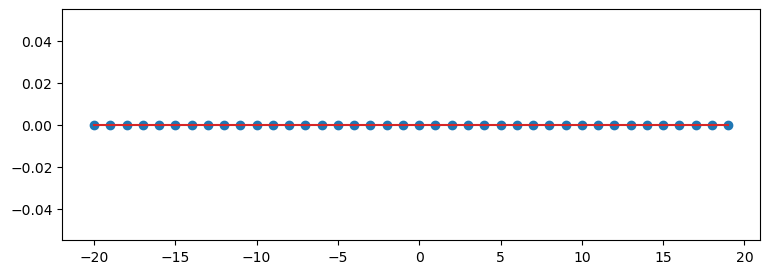

In [17]:
plt.rcParams['figure.figsize'] = 9, 3
plt.stem(kr, np.imag(x))

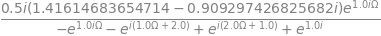

In [18]:
X = (1/(1-sym.exp(1j*W0-1j*(Omega))) - 1/(1-sym.exp(-1j*W0-1j*(Omega))))/2j
rW = (Omega, -5*sym.pi, 5*sym.pi)
X = X.simplify()
X

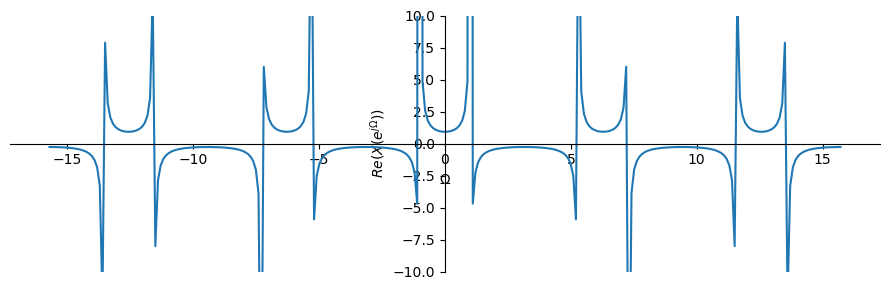

In [19]:
plt.rcParams['figure.figsize'] = 9, 3
sym.plot(sym.re(X), rW, 
         xlabel=r'$\Omega$', 
         ylabel=r'$Re( X(e^{j \Omega}) )$',
         ylim=(-10,10),
         adaptive = False)

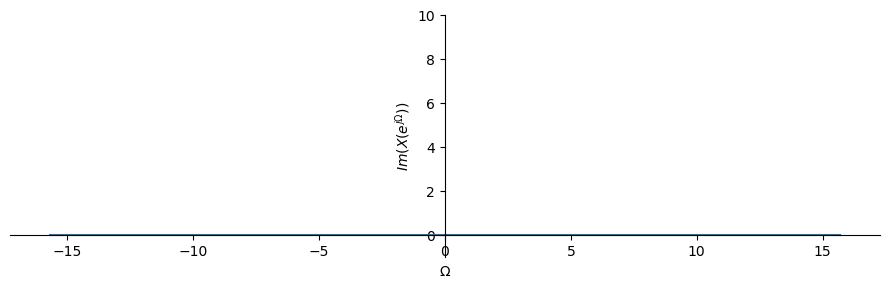

In [20]:
plt.rcParams['figure.figsize'] = 9, 3
sym.plot(sym.im(X), rW, 
         xlabel=r'$\Omega$', 
         ylabel=r'$Im( X(e^{j \Omega}) )$',
         ylim=(-1,10),
         adaptive = False)

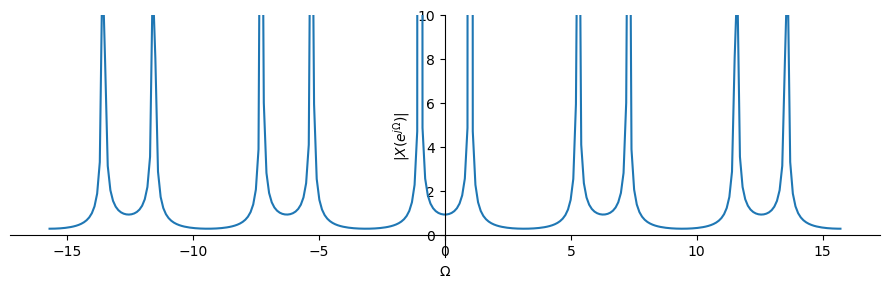

In [21]:
plt.rcParams['figure.figsize'] = 9, 3
sym.plot(sym.Abs(X), rW, 
         xlabel=r'$\Omega$', 
         ylabel=r'$| X(e^{j \Omega})|$',
         ylim=(-1,10),
         adaptive = False)


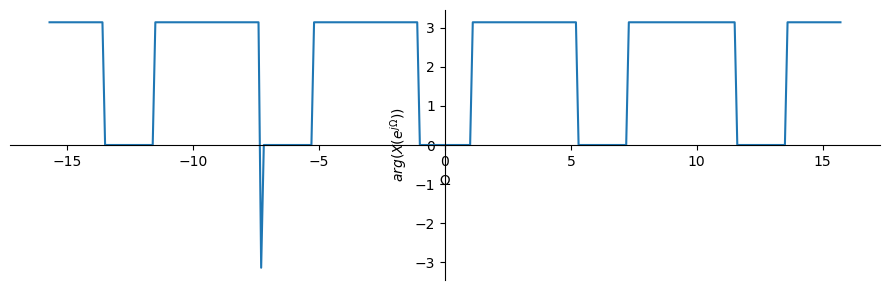

In [22]:
plt.rcParams['figure.figsize'] = 9, 3
sym.plot(sym.arg(X), rW,
         xlabel=r'$\Omega$',
         ylabel=r'$arg( X(e^{j \Omega}) )$',
         adaptive = False)

Analice los espectros de la señal seno con frecuencias:
- $1$
- $2$
- $\pi/2$
- $3\pi/2$

## Transformada de una señal arbitraria

In [23]:
import soundfile as sf

x, fs = sf.read('datos/JPDP001.wav')# Lee un archivo .wav
x = x.T[0] #Selecciona solo un canal de grabación
sf.write('temp.wav',x,fs)
x = x[20000:21000]

plt.rcParams['figure.figsize'] = 9, 3
plt.stem(x)
len(x)

LibsndfileError: Error opening 'datos/JPDP001.wav': System error.

In [ ]:
X = 0
for ind,xk in enumerate(x):
    X = X + xk*sym.exp(1j*Omega*ind)

In [ ]:
rW = (Omega, 0*sym.pi, 1*sym.pi)

plt.rcParams['figure.figsize'] = 9, 3
sym.plot(sym.Abs(X), rW, 
         xlabel=r'$\Omega$', 
         ylabel=r'$| X(e^{j \Omega})|$',
         ylim=(-1,8),
         adaptive = False)


- ¿Qué espera que pase si toma una señal de $440 000$ muestras?

## Propiedades


|            | $x[k]$ | $X(e^{j \Omega}) = \mathcal{F}_* \{ x[k] \}$ |
|:---|:---:|:---:|
| Linealidad | $A \, x_1[k] + B \, x_2[k]$ | $A \, X_1(e^{j \Omega}) + B \, X_2(e^{j \Omega})$ |
| Convolución | $x[k] * h[k]$ | $X(e^{j \Omega}) \cdot H(e^{j \Omega})$ |
| Multiplicación | $x[k] \cdot h[k]$ | $ X(e^{j \Omega}) * H(e^{j \Omega})$ |
| Desplazamiento | $x[k - \kappa]$ | $e^{-j \Omega \kappa} \cdot X(e^{j \Omega})$ |
| Modulación | $e^{j \Omega_0 k} \cdot x[k]$ | $X(e^{j (\Omega- \Omega_0)})$ |


Con $A, B \in \mathbb{C}$, $\Omega_0 \in \mathbb{R}$ y $\kappa \in \mathbb{Z}$.